# **Mapas - Delimitação da análise - escopo da pesquisa**

--- 

In [2]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

ox.__version__

'1.6.0'

In [19]:
#country_name = "Brasil"
#state_name = "Santa Catarina, Brasil"
#city_name = "Lages, Santa Catarina, Brasil"

neighborhood_info = {
    "Centro": "red",
    "Guadalupe": "blue",
    "Frei Rogério": "green",
    "Sagrado Coração de Jesus": "yellow",
    "São Cristóvão": "purple"
}

cor_fundo = "#b3b3b3"
cor_destaque = "#e41a1c"

figsize = 10, 10

fontsize_titulo = 16


### Estado

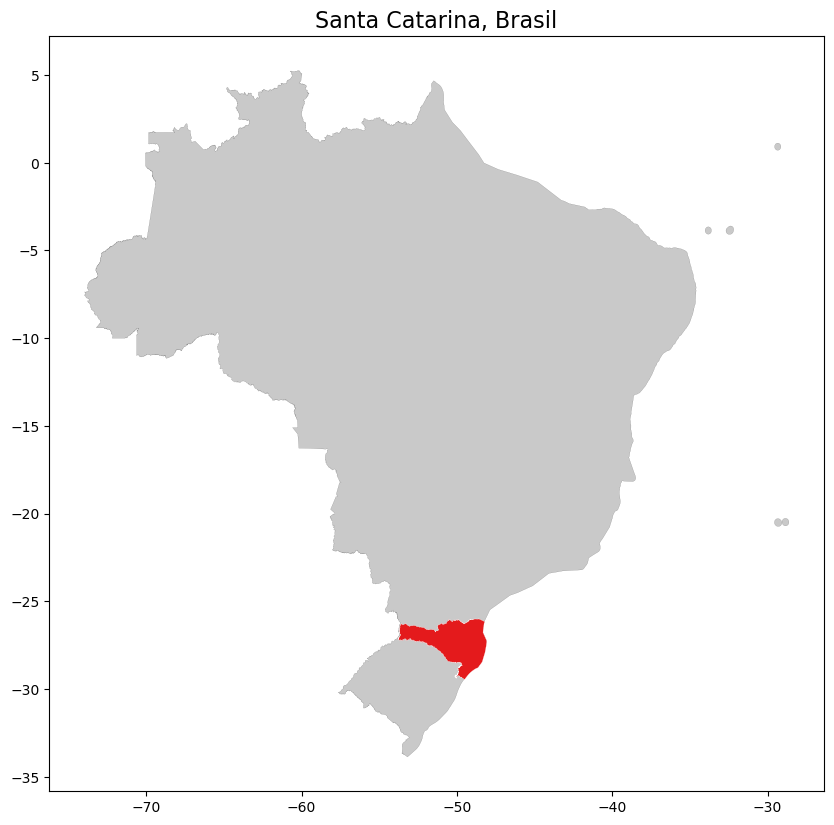

In [20]:
country_name = "Brasil"
state_name = "Santa Catarina, Brasil"

country_gdf = ox.geocode_to_gdf(country_name)
state_gdf = ox.geocode_to_gdf(state_name)

# Plot
fig, ax = plt.subplots(figsize= figsize)
country_gdf.plot(ax=ax, color= cor_fundo, edgecolor="black", linewidth=0.1, alpha=0.7)
state_gdf.plot(ax=ax, color= cor_destaque, edgecolor="white", linewidth=0.2, alpha=1)

plt.title("Santa Catarina, Brasil", fontsize= fontsize_titulo)

#ax.set_xlabel("Longitude", fontsize=12)
#ax.set_ylabel("Latitude", fontsize=12)

plt.savefig("../mapas/santa_catarina_plot.png", dpi=300, bbox_inches='tight')

plt.show()

### Cidade

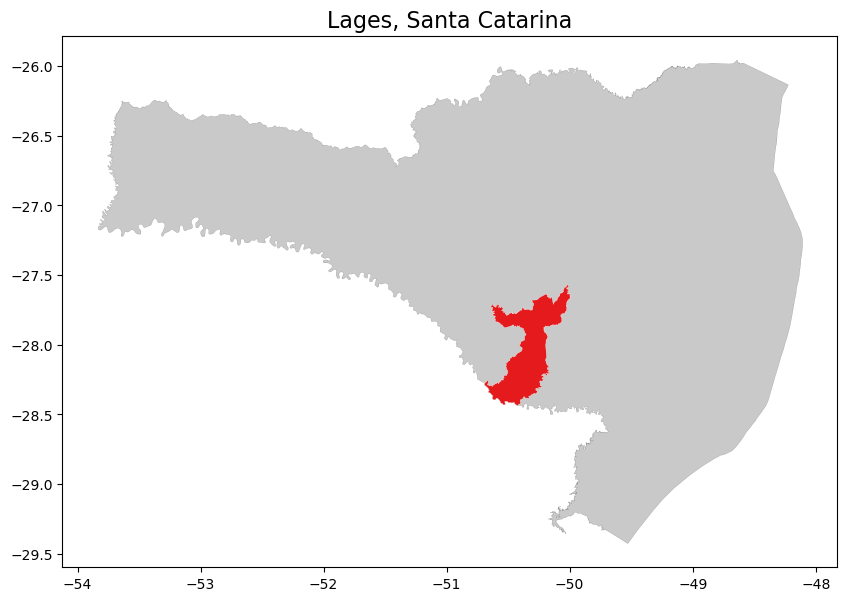

In [21]:
state_name = "Santa Catarina, Brazil"
city_name = "Lages, Santa Catarina, Brazil"

# Poligono
state_gdf = ox.geocode_to_gdf(state_name)
city_gdf = ox.geocode_to_gdf(city_name)

# Plot
fig, ax = plt.subplots(figsize= figsize)

state_gdf.plot(ax=ax, color="#b3b3b3", edgecolor="black", linewidth=0.1, alpha=0.7)
city_gdf.plot(ax=ax, color="#e41a1c", edgecolor="white", linewidth=0.2, alpha=1)

plt.title("Lages, Santa Catarina", fontsize=16)

#ax.set_xlabel("Longitude", fontsize=12)
#ax.set_ylabel("Latitude", fontsize=12)

plt.savefig("../mapas/lages_plot.png", dpi=300, bbox_inches='tight')

plt.show()

### Bairro lages sem titulo??

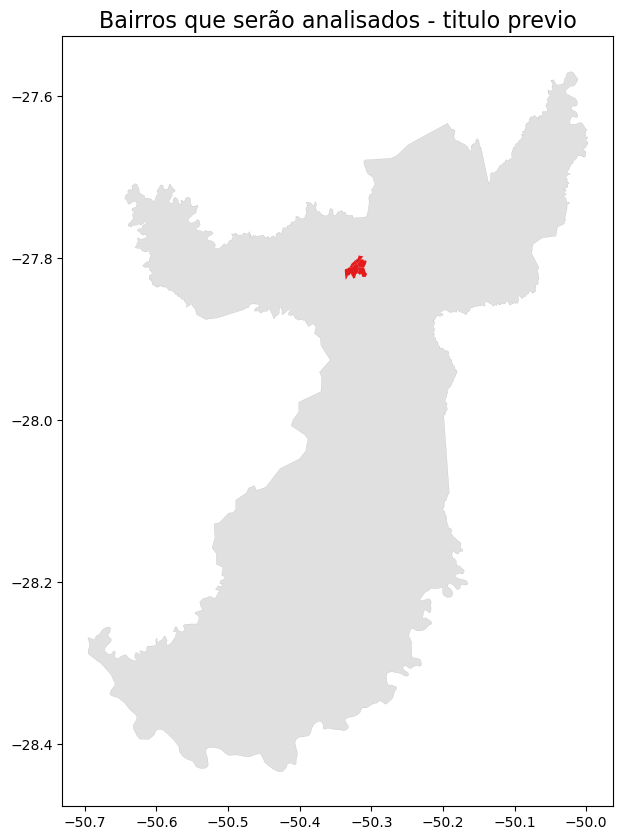

In [3]:
city_name = "Lages, Santa Catarina, Brazil"
city_gdf = ox.geocode_to_gdf(city_name)

# Empty GeoDataFrame
combined_neighborhoods = gpd.GeoDataFrame()

neighborhood_info = {
    "Centro",
    "Guadalupe",
    "Frei Rogério",
    "Sagrado Coração de Jesus",
    "São Cristóvão"
}

for name in neighborhood_info:
    place_name = f"{name}, Lages, Santa Catarina, Brazil"
    neighborhood = ox.geocode_to_gdf(place_name) 
    combined_neighborhoods = pd.concat([combined_neighborhoods, neighborhood])

# Plot
fig, ax = plt.subplots(figsize= (10, 10))

city_gdf.plot(ax=ax, color="#b3b3b3", edgecolor="black", linewidth=0.1, alpha=0.4)
combined_neighborhoods.plot(ax=ax, color="#e41a1c", edgecolor='none', linewidth=0.7)

plt.title("Bairros que serão analisados - titulo previo", fontsize=16)

#ax.set_xlabel("Longitude", fontsize=12)
#ax.set_ylabel("Latitude", fontsize=12)

plt.savefig("../mapas/bairros-previo_plot.png", dpi=300, bbox_inches='tight')

plt.show()

### Bairros

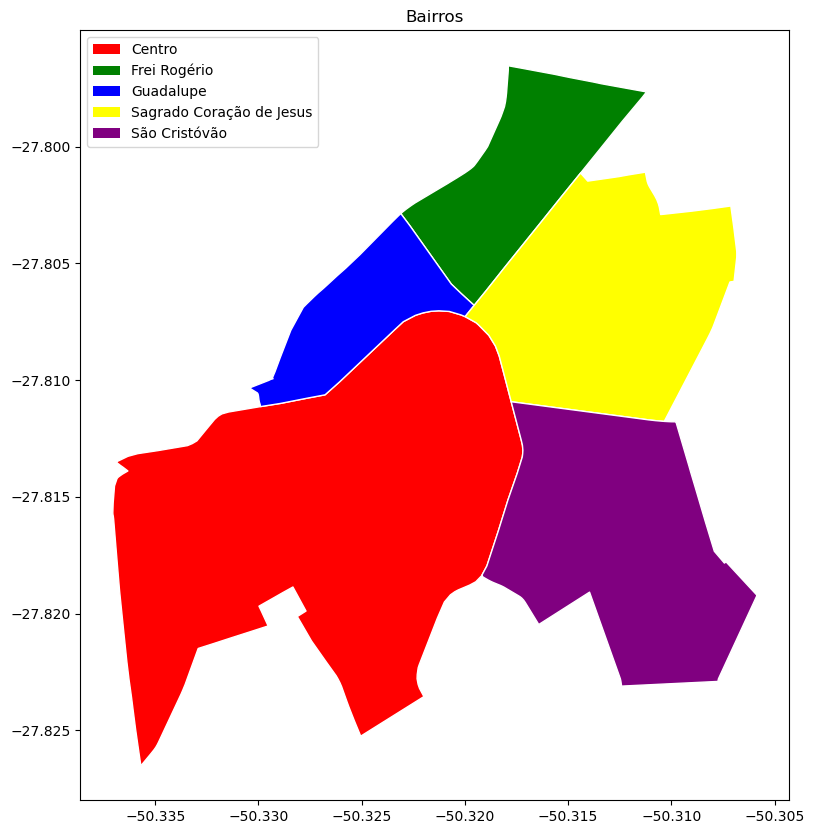

In [18]:
neighborhood_info = {
    "Centro": "red",
    "Guadalupe": "blue",
    "Frei Rogério": "green",
    "Sagrado Coração de Jesus": "yellow",
    "São Cristóvão": "purple"
}

combined_neighborhoods = gpd.GeoDataFrame()

for name, color in neighborhood_info.items():
    place_name = f"{name}, Lages, Santa Catarina, Brasil"
    neighborhood = ox.geocode_to_gdf(place_name)
    neighborhood["color"] = color
    combined_neighborhoods = pd.concat([combined_neighborhoods, neighborhood])

# Plot

fig, ax = plt.subplots(figsize=(10, 10))
handles = []
labels = []

sorted_neighborhoods = sorted(neighborhood_info.keys())

for name in sorted_neighborhoods:
    color = neighborhood_info[name]
    subset = combined_neighborhoods[combined_neighborhoods["name"] == name]
    subset.plot(ax=ax, fc=color, ec="white", label=name) 
    handles.append(plt.Rectangle((0, 0), 1, 1, fc=color))
    labels.append(name)
    
ax.set_title("Bairros")
ax.axis("on")
ax.legend(handles, labels, loc="upper left")

plt.savefig("../mapas/bairros-analise_plot.png", dpi=300, bbox_inches='tight')

plt.show()

### testes

In [ ]:
neighborhood_info = {
    "Centro": "red",
    "Guadalupe": "blue",
    "Frei Rogério": "green",
    "Sagrado Coração de Jesus": "yellow",
    "São Cristóvão": "purple"
}


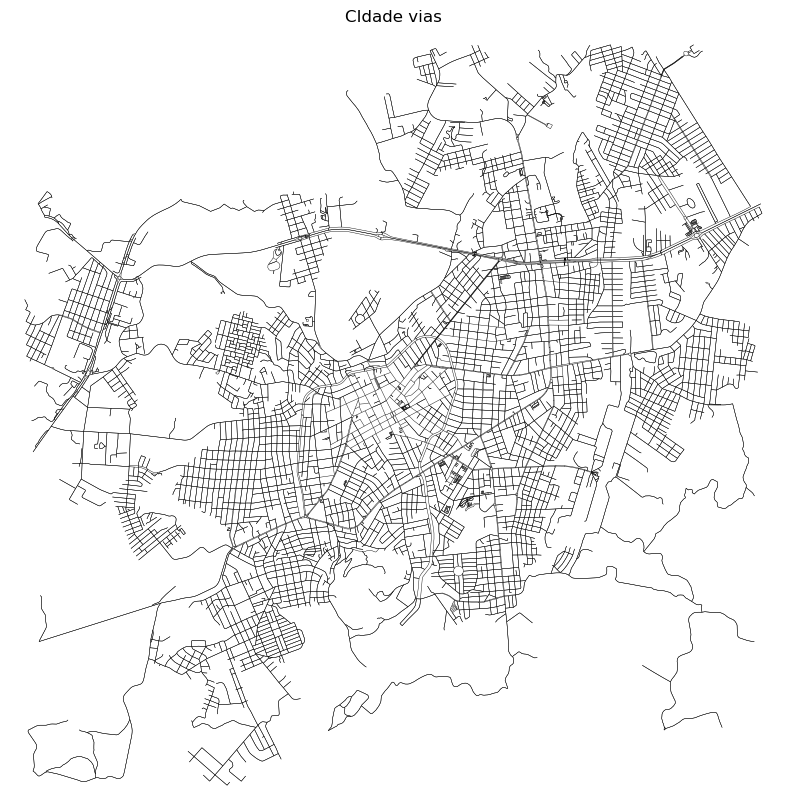

In [4]:
place_name = "Lages, Santa Catarina, Brazil"
graph = ox.graph_from_address(place_name, dist=5000, network_type="all")

fig, ax = plt.subplots(figsize=(10, 10))

ox.plot_graph(
    graph,
    node_size=0,          
    #node_color='blue',      
    edge_color='black',      
    edge_linewidth=0.3,       
    show=False,             
    close=False,            
    ax=ax,                  
)

ax.set_facecolor('white')

ax.set_title("CIdade vias")

#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

plt.savefig("../mapas/cidade_vias_plot.png", dpi=300, bbox_inches='tight')

plt.show()